In [46]:
# hack to import modules from outside this folder
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [47]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

import os

import tools
import effect
import player
import sound
import metrics
from env import CrossAdaptiveEnv, DEFAULT_CONFIG, Mode

# Render without effect

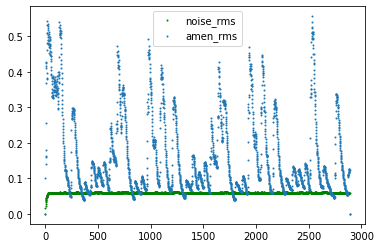

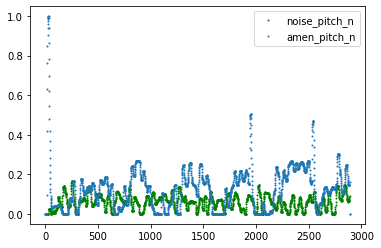

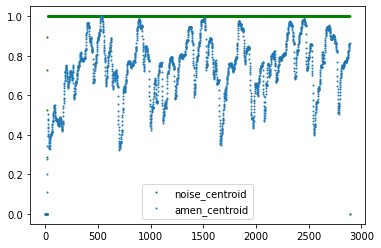

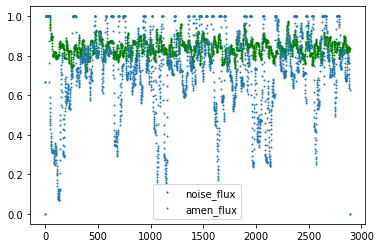

In [48]:
ANALYSIS_CHANNELS = ["rms", "pitch_n", "centroid", "flux"]

amen_sound = sound.Sound("amen_trim.wav", loop=False)
amen_sound.apply_effect()
noise_sound = sound.Sound("noise.wav", loop=False)
noise_sound.apply_effect()

noise_features = np.zeros(4)
amen_features = np.zeros(4)

done = False
while not done:
    done1 = noise_sound.render()
    done2 = amen_sound.render()
    
    noise_features = np.vstack((noise_features, noise_sound.player.get_channels(ANALYSIS_CHANNELS)))
    amen_features = np.vstack((amen_features, amen_sound.player.get_channels(ANALYSIS_CHANNELS)))

    done = done1 or done2

for i, feature in enumerate(ANALYSIS_CHANNELS):
        noise_feat = noise_features[:,i]    
        amen_feat = amen_features[:,i]
        plt.plot(noise_feat, 'go', label=f"noise_{feature}", linewidth=1, markersize=1)
        plt.plot(amen_feat, 'o', label=f"amen_{feature}", linewidth=1, markersize=1)
        plt.legend()
        plt.show()

{'drive': 5.6579702496528625, 'freq': 478.0201191455126, 'resonance': 0.2314552655816078, 'dist': 1.9049774141609668, 'mix': 0.3334157466888428, 'post_gain': 0.868644895696342}


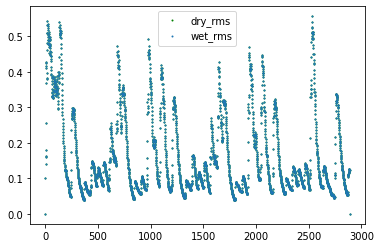

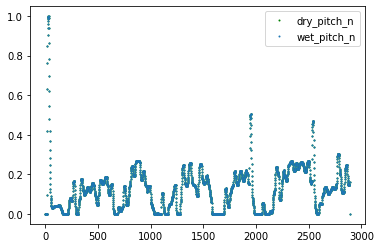

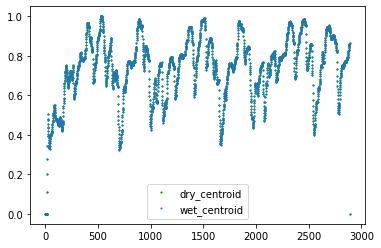

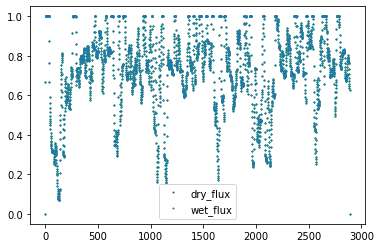

/Users/ulrikah/fag/thesis/rave/rave/bounces/dist_lpf_render_20210212_190415_134777_noise.wav


In [53]:
config = {
    "effect": effect.Effect("dist_lpf"),
    "metric": metrics.EuclideanDistance(),
    "mode": Mode.STATIC
}

env = CrossAdaptiveEnv(config)

dry = sound.Sound("amen.wav", loop=False)
dry.apply_effect()
wet = sound.Sound("amen.wav", loop=False)
wet.apply_effect(env.effect)

dry_features = np.zeros(4)
wet_features = np.zeros(4)

action = env.action_space.sample()
mapping = env.action_to_mapping(action)
print(mapping)

done = False
while not done:
    done1 = wet.render(mapping)
    done2 = dry.render()
    
    dry_features = np.vstack((dry_features, dry.player.get_channels(ANALYSIS_CHANNELS)))
    wet_features = np.vstack((wet_features, wet.player.get_channels(ANALYSIS_CHANNELS)))
    
    done = done1 or done2

for i, feature in enumerate(ANALYSIS_CHANNELS):
        dry_feat = dry_features[:,i]    
        wet_feat = wet_features[:,i]
        plt.plot(dry_feat, 'go', label=f"dry_{feature}", linewidth=1, markersize=1)
        plt.plot(wet_feat, 'o', label=f"wet_{feature}", linewidth=1, markersize=1)
        plt.legend()
        plt.show()

path = env.render()
print(path)
tools.play_wav(path)